# Explaining model using SHAP

In [1]:
import pandas as pd
import numpy as np
import plotly
np.random.seed(0)
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/winequality-red.csv')

In [3]:
df.shape

(1599, 12)

In [4]:
df.columns
df['quality'] = df['quality'].astype(int)

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<AxesSubplot:>

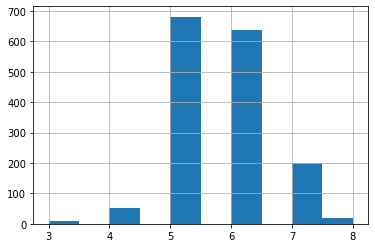

In [6]:
df['quality'].hist()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

Y = df['quality']
X =  df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [9]:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, Y_train)  

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

### Feature Importance using SHAP - Global Interpretability

In [10]:
import shap

In [11]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)

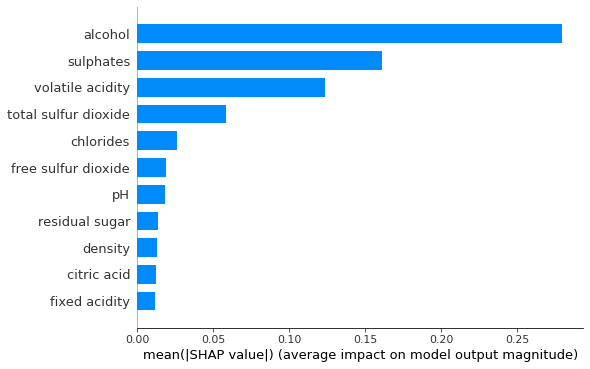

In [12]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

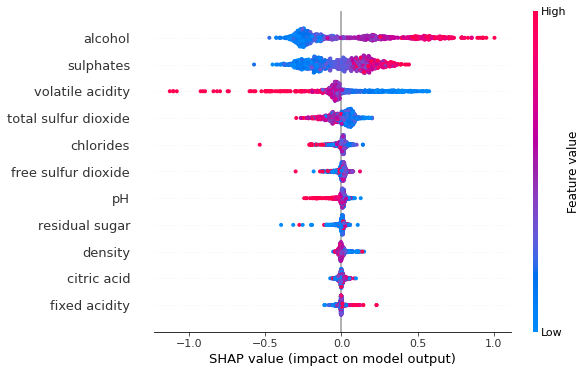

In [13]:
shap.summary_plot(shap_values, X_train)

Based on the graph, high quality rating of wine is associated with the following characteristics:

- High alcohol content
- High sulphates
- Low volatile acidity
- Low total sulfuer dioxide
- Low pH
- Low chlorides
- Low citric acid
- Low density
- High fixed acidity content
- High free sulfur dioxide
- High residual sugar

### Effects of Single Feature on the output - All Data (Global Interpretability)

The partial dependence plot shows the marginal effect one or two features have on the predicted outcome of a machine learning model. It tells whether the relationship between the target and a feature is linear, monotonic or more complex. In order to create a dependence plot, you only need one line of code: 

```shap.dependence_plot("alcohol", shap_values, X_train)```

The function automatically includes another variable that your chosen variable interacts most with. 

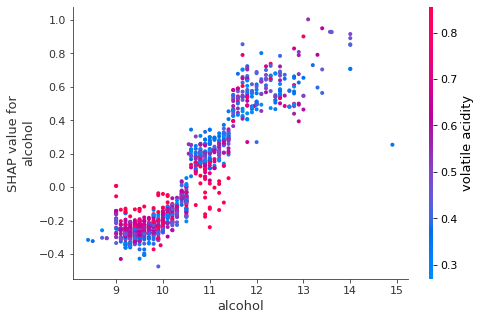

In [14]:
shap.dependence_plot("alcohol", shap_values, X_train)

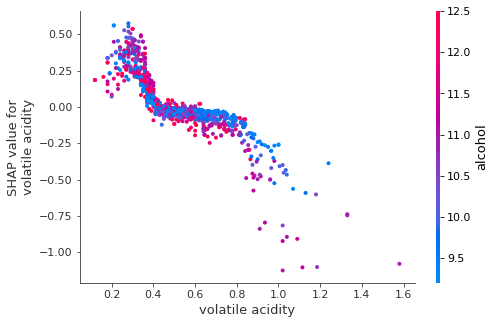

In [15]:
shap.dependence_plot("volatile acidity", shap_values, X_train)

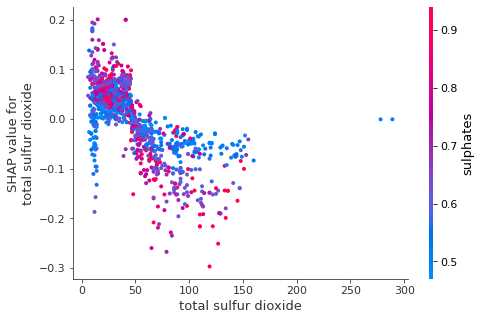

In [16]:
shap.dependence_plot("total sulfur dioxide", shap_values, X_train)

### Effects of Single Feature on the output - Each Input Data (Local Interpretability)

In [17]:
X_output = X_test.copy()
X_output.loc[:,'predict'] = np.round(model.predict(X_output),2)

random_picks = np.arange(1,330,50)
S = X_output.iloc[random_picks]
S

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,predict
1032,8.1,0.820,0.00,4.1,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,4.77
34,5.2,0.320,0.25,1.8,0.103,13.0,50.0,0.99570,3.38,0.55,9.2,5.15
1508,7.1,0.270,0.60,2.1,0.074,17.0,25.0,0.99814,3.38,0.72,10.6,6.60
1479,8.2,0.280,0.60,3.0,0.104,10.0,22.0,0.99828,3.39,0.68,10.6,6.00
866,6.8,0.490,0.22,2.3,0.071,13.0,24.0,0.99438,3.41,0.83,11.3,6.24
1519,6.6,0.700,0.08,2.6,0.106,14.0,27.0,0.99665,3.44,0.58,10.2,5.47
1193,6.4,0.885,0.00,2.3,0.166,6.0,12.0,0.99551,3.56,0.51,10.8,4.82


In [18]:
shap.initjs()

def shap_plot(j):
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

In [19]:
shap_plot(0)

In [20]:
shap_plot(1)

In [21]:
shap_plot(2)

In [22]:
shap_plot(3)

In [23]:
shap_plot(4)

### SHAP interaction values

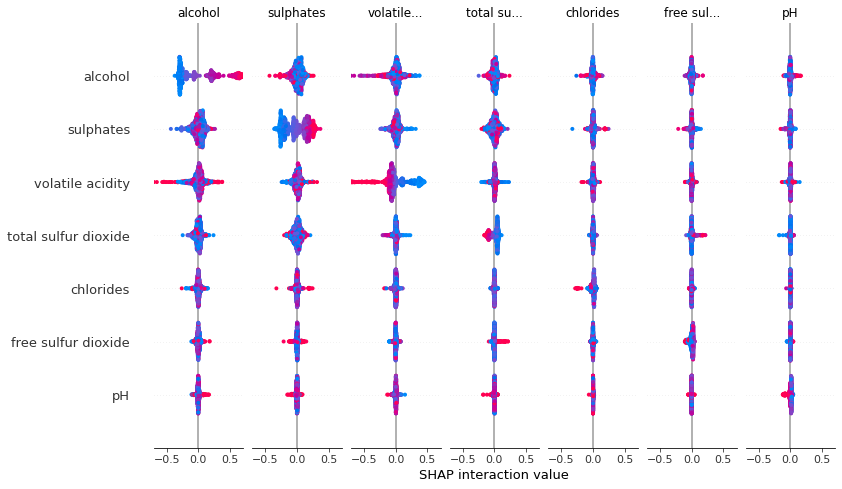

In [24]:
shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(X_train.iloc[:2000,:])

shap.summary_plot(shap_interaction_values, X_train.iloc[:2000,:])